# Análise dos dados do Portal da Transparência do MPSP

**HISTOGRAMAS DA DISTRIBUIÇÃO DE VERBAS REFERENTES A EXERCÍCIOS ANTERIORES**

**Membros ativos**


Com o recálculo da PAE, ocorrido no início de 2020, alguns colegas deixaram de receber os pagamentos mensais da PAE em decorrência do encerramento do crédito respectivo, criando-se espaço no orçamento para o pagamento de parcelas mais expressivas da chamada MAE (diferença na retroação dos subsídios).

Nesse cenário, há mais equidade: um número maior de membros é contemplado com a distribuição mais equilibrada das chamadas “Verbas Referentes a Exercícios Anteriores” (Portal MPSP > Portal da Transparência > Contracheque > Verbas Referentes a Exercícios Anteriores > Membros), como mostram os histogramas(1) aqui exibidos.

Os histogramas foram gerados por um programa escrito em Python, que está disponível para a conferência das informações geradas (2 e 3).


________
Observações:
(1) O histograma é um “gráfico” que mostra a distribuição de frequências de um conjunto de dados dividido em classes. No caso em estudo, o eixo x corresponde à classe dos valores recebidos e o eixo y a quantidade de membros contemplada.

(2) Dados publicados no Portal relativos a determinados meses não estão padronizados e têm que passar por processos de “limpeza” para a análise com o script. O programa funciona, entretanto, para a maioria dos datasets existentes.

(3) https://github.com/jespimentel



Para copiar o caminho, clique com o botão da direita do mouse no link correspondente ao mês.


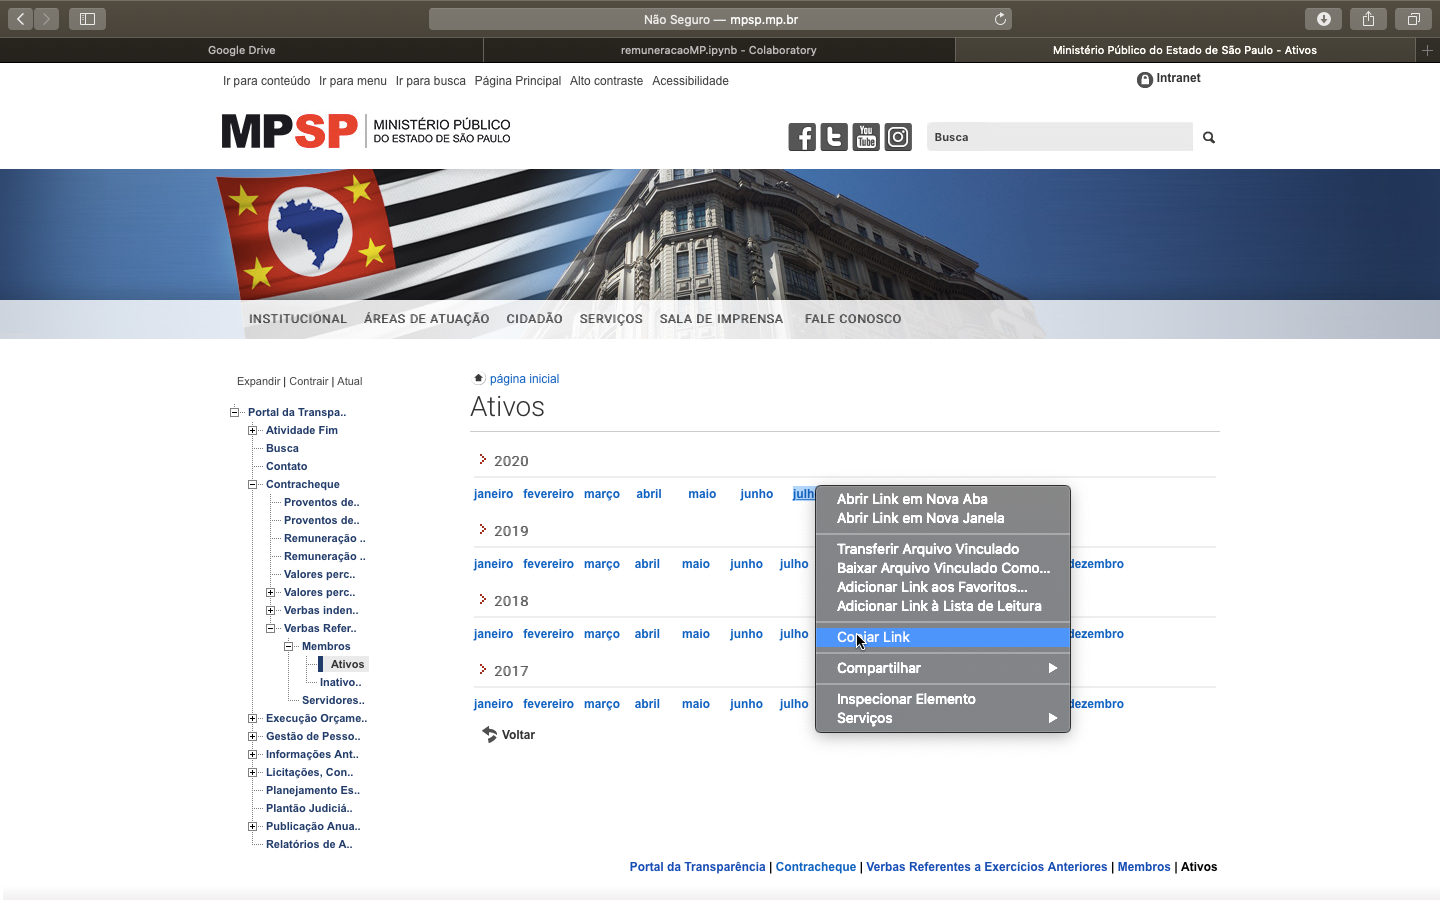

In [1]:
# Importação de biblioteca e módulos

!pip install odfpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Mês de referência - Novembro de 2019

In [ ]:
# Leitura dos dados do Portal da Transparência

path_ex_ant = 'http://www.mpsp.mp.br/portal/page/portal/Portal_da_Transparencia/Contracheque/Verbas-exec-anteriores/Verbas-exec-anteriores-Membros/Ativos_membros/Tabela%20II%20memb112019.ods'
ex_ant = pd.read_excel(path_ex_ant, engine='odf')
ex_ant = ex_ant [2:2529] # Primeiro e último nome (+1)
ex_ant # Exibe o dataframe

In [3]:
ex_ant.columns

Index(['MATRÍCULA', 'NOME', 'CARGO/FUNÇÃO', 'LOTAÇÃO',
       '2019-12-16T00:00:00Número do processo com a devida caracterização de seu órgão de origem. Exemplo: Processo 001.376/2016/SG/MPF.NÚMERO DO PROCESSO1',
       '2019-12-16T00:00:00Denominação da verba objeto do processo ou justificativa do pagamento.OBJETO DO PROCESSO2',
       '2019-12-16T00:00:00Classificar o processo de concessão da verba como de natureza judicial ou administrativa.ORIGEM DO PROCESSO (JUDICIAL OU ADMINISTRATIVO)3',
       '2019-12-16T00:00:00Valor bruto recebido no mês.VALOR BRUTO4',
       'DESCONTOS', 'Unnamed: 9',
       '2019-12-16T00:00:00Total de Descontos Efetuados.TOTAL DE DESCONTOS7',
       '2019-12-16T00:00:00Valor Líquido Recebido.VALOR LÍQUIDO8'],
      dtype='object')

In [4]:
# Renomeia as colunas
ex_ant.columns = ['MATRÍCULA', 'NOME', 'CARGO/FUNÇÃO', 'LOTAÇÃO', 'NÚMERO DO PROCESSO', 'OBJETO DO PROCESSO', 'ORIGEM DO PROCESSO (JUDICIAL OU ADMINISTRATIVO)',
       'VALOR BRUTO','CONTRIBUIÇÃO PREVIDENCIÁRIA', 'IMPOSTO DE RENDA','TOTAL DE DESCONTOS','VALOR LÍQUIDO']

In [5]:
criterio = ex_ant['OBJETO DO PROCESSO'] == 'Parcela Autônoma de Equivalencia'
print ('PAE - Nov 2019')
print ('Total gasto: R$', '{0:.2f}'.format(ex_ant[criterio]['VALOR BRUTO'].sum()))
print ('Quantos receberam: ', ex_ant[criterio]['VALOR BRUTO'].count())

PAE - Nov 2019
Total gasto: R$ 10492034.62
Quantos receberam:  881


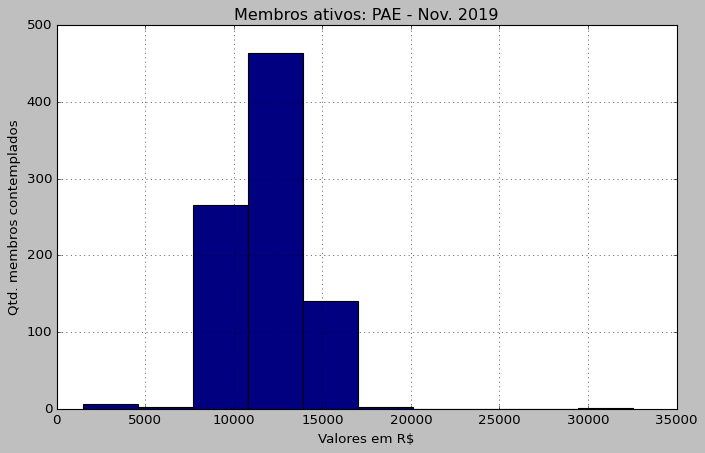

In [6]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))
plt.hist(ex_ant[criterio]['VALOR BRUTO'], color = 'navy')
plt.grid(True)
plt.title('Membros ativos: PAE - Nov. 2019')
plt.xlabel('Valores em R$')
plt.ylabel('Qtd. membros contemplados')
plt.savefig('pae_11_2019.png')
plt.show()
plt.close()

In [7]:
criterio = ex_ant['OBJETO DO PROCESSO'] == 'Diferença de Subsídios de 2005 a 2007'
print ('Dif. Subsídios (MAE) - Nov 2019')
print ('Total gasto: R$', '{0:.2f}'.format(ex_ant[criterio]['VALOR BRUTO'].sum()))
print ('Quantos receberam: ', ex_ant[criterio]['VALOR BRUTO'].count())

Dif. Subsídios (MAE) - Nov 2019
Total gasto: R$ 897788.72
Quantos receberam:  1550


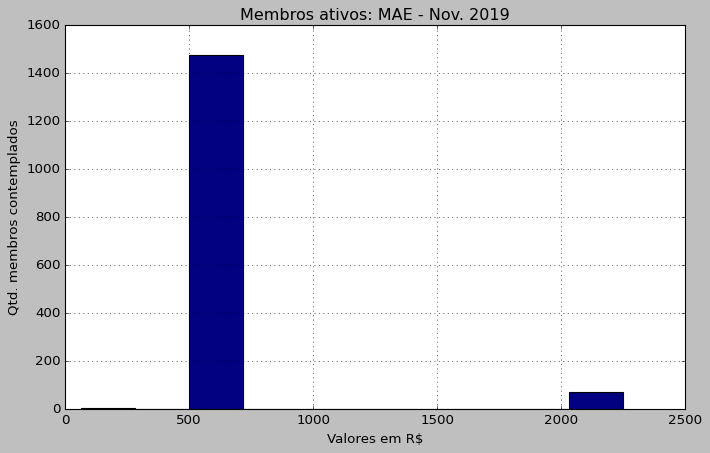

In [8]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))
plt.hist(ex_ant[criterio]['VALOR BRUTO'], color = 'navy')
plt.grid(True)
plt.title('Membros ativos: MAE - Nov. 2019')
plt.xlabel('Valores em R$')
plt.ylabel('Qtd. membros contemplados')
plt.savefig('mae_11_2019.png')
plt.show()
plt.close()

In [9]:
criterio = ex_ant['OBJETO DO PROCESSO'] == 'Diferença Remuneratória do cargo de PJ Subst. 2000 a 2005'
print ('Parcelinha - Nov 2019')
print ('Total gasto: R$', '{0:.2f}'.format(ex_ant[criterio]['VALOR BRUTO'].sum()))
print ('Quantos receberam: ', ex_ant[criterio]['VALOR BRUTO'].count())

Parcelinha - Nov 2019
Total gasto: R$ 198711.46
Quantos receberam:  96


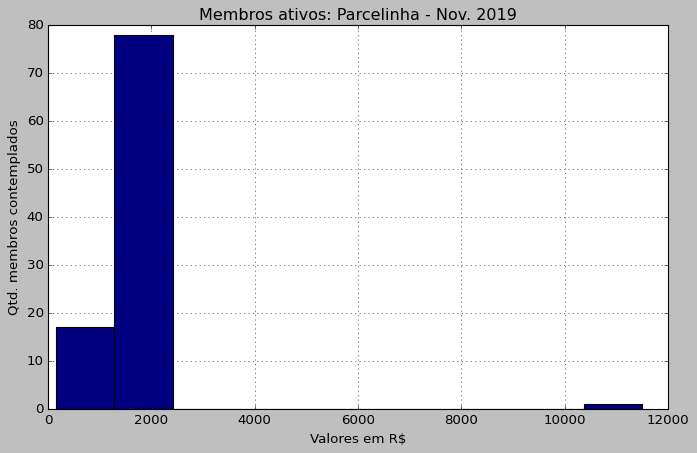

In [10]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))
plt.hist(ex_ant[criterio]['VALOR BRUTO'], color = 'navy')
plt.grid(True)
plt.title('Membros ativos: Parcelinha - Nov. 2019')
plt.xlabel('Valores em R$')
plt.ylabel('Qtd. membros contemplados')
plt.savefig('parcelinha_11_2019.png')
plt.show()
plt.close()

In [11]:
agrup_matric = ex_ant.groupby([ex_ant['MATRÍCULA'], ex_ant['OBJETO DO PROCESSO']])['VALOR BRUTO'].sum()
agrup_matric = agrup_matric.unstack()
agrup_matric = agrup_matric.fillna(0)
agrup_matric

OBJETO DO PROCESSO,Diferença Remuneratória do cargo de PJ Subst. 2000 a 2005,Diferença de Subsídios de 2005 a 2007,Parcela Autônoma de Equivalencia
MATRÍCULA,,,
207,0.0,500.0,0.00
239,0.0,500.0,0.00
721,0.0,500.0,10472.67
724,0.0,500.0,11744.76
726,0.0,500.0,10082.25
...,...,...,...
977609,0.0,500.0,10853.90
978714,0.0,500.0,12128.82
982678,0.0,500.0,13448.22


In [12]:
agrup_matric['Total'] = agrup_matric['Diferença Remuneratória do cargo de PJ Subst. 2000 a 2005'] + agrup_matric['Diferença de Subsídios de 2005 a 2007'] + agrup_matric['Parcela Autônoma de Equivalencia']
agrup_matric.to_excel('agrup_matric_Nov_2019.xlsx')
print ('Novembro de 2019\n')
agrup_matric

Novembro de 2019



OBJETO DO PROCESSO,Diferença Remuneratória do cargo de PJ Subst. 2000 a 2005,Diferença de Subsídios de 2005 a 2007,Parcela Autônoma de Equivalencia,Total
MATRÍCULA,,,,
207,0.0,500.0,0.00,500.00
239,0.0,500.0,0.00,500.00
721,0.0,500.0,10472.67,10972.67
724,0.0,500.0,11744.76,12244.76
726,0.0,500.0,10082.25,10582.25
...,...,...,...,...
977609,0.0,500.0,10853.90,11353.90
978714,0.0,500.0,12128.82,12628.82
982678,0.0,500.0,13448.22,13948.22


In [13]:
print ('Valor total - Ex. anteriores - Nov 2019')
print (agrup_matric.sum())

Valor total - Ex. anteriores - Nov 2019
OBJETO DO PROCESSO
Diferença Remuneratória do cargo de PJ Subst. 2000 a 2005      198711.46
Diferença de Subsídios de 2005 a 2007                          897788.72
Parcela Autônoma de Equivalencia                             10492034.62
Total                                                        11588534.80
dtype: float64


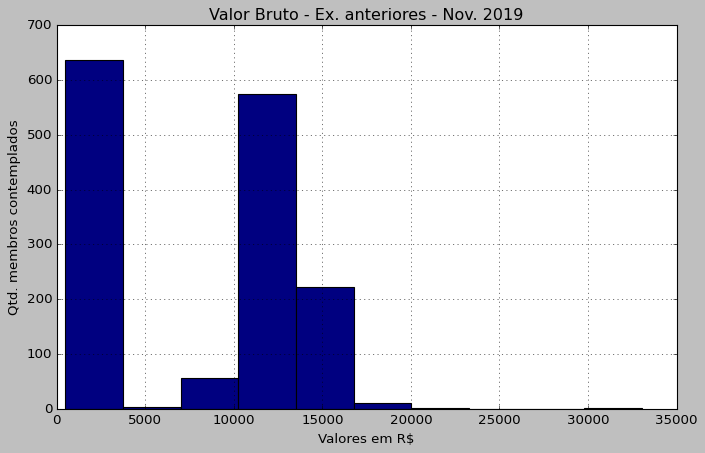


Valor Bruto - Ex. anteriores - Novembro de 2019: R$ 11588534.80


In [14]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))
plt.hist(agrup_matric['Total'], color='navy')
plt.grid(True)
plt.title('Valor Bruto - Ex. anteriores - Nov. 2019')
plt.xlabel('Valores em R$')
plt.ylabel('Qtd. membros contemplados')
plt.savefig('bruto_ex_ant_11_2019.png')
plt.show()
plt.close()

print ('\nValor Bruto - Ex. anteriores - Novembro de 2019: R$ ' + '{0:.2f}'. format (agrup_matric['Total'].sum()))

## PARA OUTROS MESES, RODE O CÓDIGO A PARTIR DAQUI

In [15]:
# Importação de biblioteca e módulos

!pip install odfpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path_ex_ant = input ('Entre com o caminho para a leitura do portal: ')
mes_referencia = input ('Entre com o mês de referência: ')
ex_ant = pd.read_excel(path_ex_ant, engine='odf')
ex_ant.head(20)

In [ ]:
ex_ant.tail(20)

In [ ]:
lim_inf = int (input('Entre com o limite superior do dataframe: ')) # 1a. linha em que aparece nome de membro
lim_sup = int (input('Entre com o limite inferior do dataframe: ')) # Última linha em que aparece nome de membro
ex_ant = ex_ant [lim_inf: lim_sup+1]
ex_ant

In [19]:
# Exibe as colunas originais do dataframe
ex_ant.columns

Index(['MATRÍCULA', 'NOME', 'CARGO/FUNÇÃO', 'LOTAÇÃO ',
       '2020-08-14T00:00:00Número do processo com a devida caracterização de seu órgão de origem. Exemplo: Processo 001.376/2016/SG/MPF.NÚMERO DO PROCESSO1',
       '2020-08-14T00:00:00Denominação da verba objeto do processo ou justificativa do pagamento.OBJETO DO PROCESSO2',
       '2020-08-14T00:00:00Classificar o processo de concessão da verba como de natureza judicial ou administrativa.ORIGEM DO PROCESSO (JUDICIAL OU ADMINISTRATIVO)3',
       '2020-08-14T00:00:00Valor bruto recebido no mês.VALOR BRUTO4',
       'DESCONTOS', 'Unnamed: 9',
       '2020-08-14T00:00:00Total de Descontos Efetuados.TOTAL DE DESCONTOS7',
       '2020-08-14T00:00:00Valor Líquido Recebido.VALOR LÍQUIDO8'],
      dtype='object')

In [20]:
# Renomeia as colunas
ex_ant.columns = ['MATRÍCULA', 'NOME', 'CARGO/FUNÇÃO', 'LOTAÇÃO', 'NÚMERO DO PROCESSO', 'OBJETO DO PROCESSO', 'ORIGEM DO PROCESSO (JUDICIAL OU ADMINISTRATIVO)',
       'VALOR BRUTO','CONTRIBUIÇÃO PREVIDENCIÁRIA', 'IMPOSTO DE RENDA','TOTAL DE DESCONTOS','VALOR LÍQUIDO']

In [21]:
criterio = ex_ant['OBJETO DO PROCESSO'] == 'Parcela Autônoma de Equivalencia'
print ('PAE - ' + mes_referencia)
print ('Total gasto: R$ ', '{0:.2f}'.format(ex_ant[criterio]['VALOR BRUTO'].sum()))
print ('Quantos receberam: ', (ex_ant[criterio]['VALOR BRUTO']).count())

PAE - Julho de 2020
Total gasto: R$  5839436.20
Quantos receberam:  557


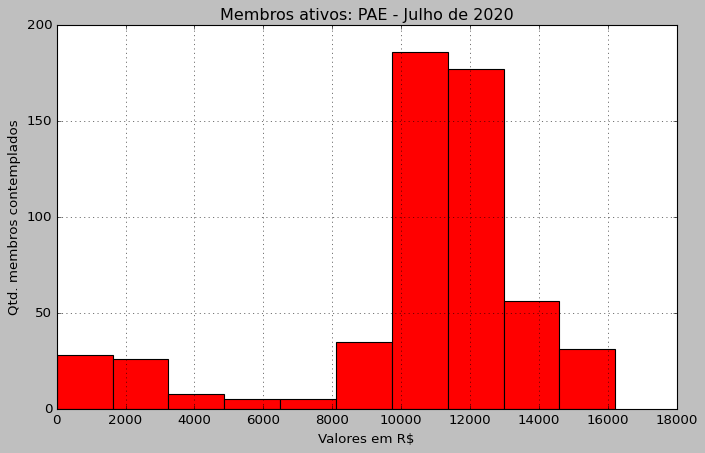

In [22]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))
plt.hist(ex_ant[criterio]['VALOR BRUTO'], color = 'red')
plt.grid(True)
plt.title('Membros ativos: PAE - ' + mes_referencia)
plt.xlabel('Valores em R$')
plt.ylabel('Qtd. membros contemplados')
plt.savefig('pae_{}.png'.format(mes_referencia))
plt.show()
plt.close()

In [23]:
criterio = ex_ant['OBJETO DO PROCESSO'] == 'Diferença de Subsídios de 2005 a 2007'
print ('Dif. Subsídios (MAE) - ' + mes_referencia)
print ('Total gasto: R$ ', '{0:.2f}'.format(ex_ant[criterio]['VALOR BRUTO'].sum()))
print ('Quantos receberam: ', ex_ant[criterio]['VALOR BRUTO'].count())

Dif. Subsídios (MAE) - Julho de 2020
Total gasto: R$  9664762.26
Quantos receberam:  1456


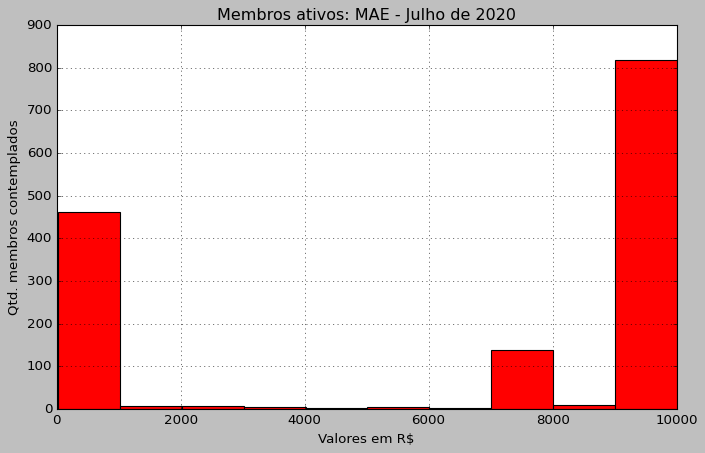

In [24]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))
plt.hist(ex_ant[criterio]['VALOR BRUTO'], color = 'red')
plt.grid(True)
plt.title('Membros ativos: MAE - ' + mes_referencia)
plt.xlabel('Valores em R$')
plt.ylabel('Qtd. membros contemplados')
plt.savefig('mae_{}.png'.format(mes_referencia))
plt.show()
plt.close()

In [25]:
criterio = ex_ant['OBJETO DO PROCESSO'] == 'Diferença Remuneratória do cargo de PJ Subst. 2000 a 2005'
print ('Parcelinha - ' + mes_referencia)
print ('Total gasto: R$ ', '{0:.2f}'.format(ex_ant[criterio]['VALOR BRUTO'].sum()))
print ('Quantos receberam: ', ex_ant[criterio]['VALOR BRUTO'].count())

Parcelinha - Julho de 2020
Total gasto: R$  254838.48
Quantos receberam:  120


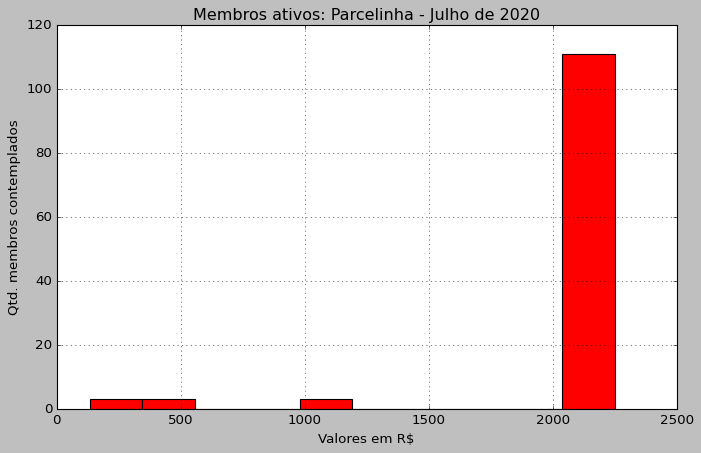

In [26]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))
plt.hist(ex_ant[criterio]['VALOR BRUTO'], color = 'red')
plt.grid(True)
plt.title('Membros ativos: Parcelinha - ' + mes_referencia)
plt.xlabel('Valores em R$')
plt.ylabel('Qtd. membros contemplados')
plt.savefig('parcelinha_{}.png'.format(mes_referencia))
plt.show()
plt.close()

In [27]:
agrup_matric = ex_ant.groupby([ex_ant['MATRÍCULA'], ex_ant['OBJETO DO PROCESSO']])['VALOR BRUTO'].sum()
agrup_matric = agrup_matric.unstack()
agrup_matric = agrup_matric.fillna(0)
agrup_matric

OBJETO DO PROCESSO,Diferença Remuneratória do cargo de PJ Subst. 2000 a 2005,Diferença de Subsídios de 2005 a 2007,Parcela Autônoma de Equivalencia
MATRÍCULA,,,
207,0.0,10000.00,0.00
239,0.0,10000.00,0.00
721,0.0,500.00,10472.67
724,0.0,500.00,11744.76
726,0.0,500.00,10082.25
...,...,...,...
971954,0.0,9691.97,308.03
973510,0.0,500.00,15322.29
977609,0.0,500.00,10853.90


In [28]:
agrup_matric['Total'] = agrup_matric['Diferença Remuneratória do cargo de PJ Subst. 2000 a 2005'] + agrup_matric['Diferença de Subsídios de 2005 a 2007'] + agrup_matric['Parcela Autônoma de Equivalencia']
agrup_matric.to_excel('agrup_matric_{}.xlsx'.format(mes_referencia))
print (mes_referencia + '\n')
agrup_matric

Julho de 2020



OBJETO DO PROCESSO,Diferença Remuneratória do cargo de PJ Subst. 2000 a 2005,Diferença de Subsídios de 2005 a 2007,Parcela Autônoma de Equivalencia,Total
MATRÍCULA,,,,
207,0.0,10000.00,0.00,10000.00
239,0.0,10000.00,0.00,10000.00
721,0.0,500.00,10472.67,10972.67
724,0.0,500.00,11744.76,12244.76
726,0.0,500.00,10082.25,10582.25
...,...,...,...,...
971954,0.0,9691.97,308.03,10000.00
973510,0.0,500.00,15322.29,15822.29
977609,0.0,500.00,10853.90,11353.90


In [29]:
print ('Valor total - Ex. anteriores - ' + mes_referencia)
print (agrup_matric.sum())

Valor total - Ex. anteriores - Julho de 2020
OBJETO DO PROCESSO
Diferença Remuneratória do cargo de PJ Subst. 2000 a 2005      254838.48
Diferença de Subsídios de 2005 a 2007                         9664762.26
Parcela Autônoma de Equivalencia                              5839436.20
Total                                                        15759036.94
dtype: float64


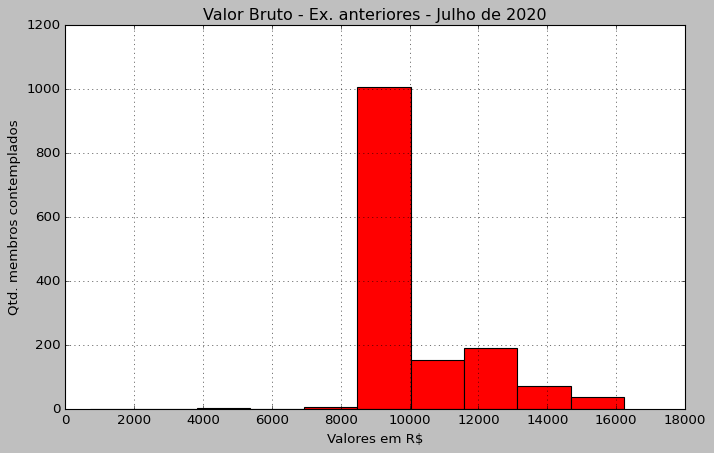


Valor Bruto - Ex. anteriores - Julho de 2020: R$ 15759036.94


In [30]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))
plt.hist(agrup_matric['Total'], color='red')
plt.grid(True)
plt.title('Valor Bruto - Ex. anteriores - ' + mes_referencia)
plt.xlabel('Valores em R$')
plt.ylabel('Qtd. membros contemplados')
plt.savefig('bruto_ex_ant_{}.png'.format(mes_referencia))
plt.show()
plt.close()

print ('\nValor Bruto - Ex. anteriores - ' + mes_referencia + ': R$ {0:.2f}'. format (agrup_matric['Total'].sum()))